In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0105/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 458 ms, sys: 17.8 ms, total: 476 ms
Wall time: 478 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.010814,0.0,-0.010528,0.0,-0.007839,4.042582e-03,-0.015733,4.042582e-03,0.208810,...,0.0,0.003892,0.0,0.002779,0.0,-0.033904,0.0,-0.018464,0.0,0.001312
1,0.0,-0.006430,0.0,0.012639,0.0,-0.001413,0.000000e+00,-0.013234,1.256398e-06,0.178798,...,0.0,-0.013009,0.0,-0.002402,0.0,-0.011110,0.0,-0.027494,0.0,-0.003227
2,0.0,-0.005055,0.0,0.009427,0.0,-0.004568,0.000000e+00,0.010436,2.405004e-05,0.171103,...,0.0,-0.001201,0.0,-0.002927,0.0,-0.041272,0.0,-0.008074,0.0,-0.005275
3,0.0,0.001632,0.0,0.025446,0.0,0.001462,7.707083e-08,0.008084,4.103336e-07,0.114497,...,0.0,-0.005206,0.0,-0.001036,0.0,-0.024987,0.0,-0.001255,0.0,-0.003272
4,0.0,-0.000513,0.0,0.007844,0.0,-0.001300,1.763056e-02,-0.027426,4.753948e-03,0.097177,...,0.0,0.006543,0.0,0.006006,0.0,-0.015281,0.0,-0.016180,0.0,-0.003769


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,4.042582e-03,4.042582e-03,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,1.256398e-06,0.008003,0.000066,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,2.405004e-05,0.000006,0.000000,0.000000,0.0,0.0,...,0.000232,0.000442,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,7.707083e-08,4.103336e-07,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,2.825606e-07,2.048439e-07,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.763056e-02,4.753948e-03,0.000053,0.293578,0.002784,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,4.050764e-03,4.050764e-03,0.000000e+00,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,1.256399e-06,8.034638e-03,0.000066,0.000000,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,2.405033e-05,6.443295e-06,0.000000,0.000000,0.0,0.0,...,0.000232,4.419209e-04,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,7.707083e-08,4.103337e-07,0.000000e+00,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000e+00,2.825606e-07,2.048439e-07,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.778690e-02,4.765266e-03,5.335709e-05,0.341217,0.002787,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,3.669061e-05,6.370256e-04,3.337987e-09,0.000000,0.000000,0.0,0.0,...,0.000000,6.270229e-11,1.196620e-05,6.892144e-07,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    40.000001
1    46.002743
2    58.000696
3    41.000032
4    41.001190
5    36.000022
6    23.000001
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.010814,-0.010528,-0.007839,-0.015733,0.208810,-0.021249,-0.016524,0.044367,-0.011808,-0.002722,...,0.003800,0.084365,-0.011007,-0.000824,-0.009047,0.003892,0.002779,-0.033904,-0.018464,0.001312
1,-0.006430,0.012639,-0.001413,-0.013234,0.178798,-0.004173,0.030510,0.044270,-0.016416,0.001119,...,0.005771,0.042425,-0.011178,0.004431,-0.017495,-0.013009,-0.002402,-0.011110,-0.027494,-0.003227
2,-0.005055,0.009427,-0.004568,0.010436,0.171103,-0.008256,0.038708,0.053373,-0.007498,-0.003942,...,-0.007007,0.065254,-0.011880,-0.001317,-0.011378,-0.001201,-0.002927,-0.041272,-0.008074,-0.005275
3,0.001632,0.025446,0.001462,0.008084,0.114497,-0.003990,0.026412,0.044140,-0.004701,0.002359,...,-0.001871,-0.001841,0.001989,0.019496,0.002452,-0.005206,-0.001036,-0.024987,-0.001255,-0.003272
4,-0.000513,0.007844,-0.001300,-0.027426,0.097177,-0.012561,0.021906,0.029735,-0.005838,0.004290,...,0.024244,0.010323,-0.007845,0.003886,-0.001149,0.006543,0.006006,-0.015281,-0.016180,-0.003769


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.010756,-0.010473,-0.007808,-0.015610,0.232211,-0.021025,-0.016389,0.045366,-0.011739,-0.002718,...,0.003807,0.088026,-0.010946,-0.000824,-0.009007,0.003900,0.002783,-0.033336,-0.018294,0.001313
1,-0.006410,0.012719,-0.001412,-0.013147,0.195779,-0.004164,0.030981,0.045265,-0.016282,0.001119,...,0.005788,0.043338,-0.011116,0.004441,-0.017343,-0.012925,-0.002399,-0.011049,-0.027119,-0.003222
2,-0.005042,0.009472,-0.004557,0.010491,0.186613,-0.008222,0.039467,0.054823,-0.007470,-0.003934,...,-0.006982,0.067430,-0.011810,-0.001316,-0.011313,-0.001201,-0.002923,-0.040432,-0.008042,-0.005261
3,0.001633,0.025773,0.001463,0.008117,0.121309,-0.003982,0.026764,0.045129,-0.004690,0.002362,...,-0.001869,-0.001839,0.001991,0.019687,0.002455,-0.005192,-0.001036,-0.024678,-0.001255,-0.003267
4,-0.000512,0.007875,-0.001299,-0.027054,0.102056,-0.012483,0.022148,0.030181,-0.005821,0.004299,...,0.024541,0.010377,-0.007815,0.003894,-0.001148,0.006564,0.006024,-0.015165,-0.016050,-0.003762
5,0.004983,0.020268,0.005699,0.005176,0.116325,-0.008199,0.033995,0.054790,-0.000639,0.001528,...,0.007193,0.024927,0.004988,0.021191,0.000543,-0.001331,0.000360,-0.021296,-0.006035,-0.003082
6,-0.000309,0.024839,-0.003142,0.014801,0.114559,-0.014168,0.036293,0.056468,-0.001739,0.003476,...,-0.001439,0.014414,0.002182,0.015287,-0.003809,-0.005367,-0.003130,-0.033335,-0.003917,-0.002926


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.000000,0.000000,0.000000,0.232211,0.0,0.000000,0.045366,0.0,0.000000,...,0.003807,0.088026,0.000000,0.000000,0.000000,0.003900,0.002783,0.0,0.0,0.001313
1,0.000000,0.012719,0.000000,0.000000,0.195779,0.0,0.030981,0.045265,0.0,0.001119,...,0.005788,0.043338,0.000000,0.004441,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,0.000000,0.009472,0.000000,0.010491,0.186613,0.0,0.039467,0.054823,0.0,0.000000,...,0.000000,0.067430,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.001633,0.025773,0.001463,0.008117,0.121309,0.0,0.026764,0.045129,0.0,0.002362,...,0.000000,0.000000,0.001991,0.019687,0.002455,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.007875,0.000000,0.000000,0.102056,0.0,0.022148,0.030181,0.0,0.004299,...,0.024541,0.010377,0.000000,0.003894,0.000000,0.006564,0.006024,0.0,0.0,0.000000


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    28.648847
1    31.832094
2    36.144721
3    24.070608
4    21.349573
5    30.020887
6    24.824792
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0104_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0104_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0104_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.000001,28.648847
1,46.002743,31.832094
2,58.000696,36.144721
3,41.000032,24.070608
4,41.001190,21.349573
5,36.000022,30.020887
6,23.000001,24.824792


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

14.731942916970306

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

13.108963532223227

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.6366847600462977, pvalue=0.12414948691974736)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-1.2897542505766322

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 257 ms, sys: 70.9 ms, total: 328 ms
Wall time: 329 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-0.00506586,  0.00398433,  0.00914145, ...,  0.00530565,
         0.0032407 ,  0.0054692 ],
       [-0.00140631,  0.00597572,  0.0079391 , ...,  0.00788653,
         0.00326288,  0.00274861],
       [-0.00228226,  0.00609362,  0.00808227, ...,  0.00724423,
         0.00191736,  0.00493276],
       ...,
       [-0.00443596, -0.00187939, -0.00595117, ...,  0.00100243,
         0.0065757 ,  0.00119829],
       [-0.00602168, -0.0012266 , -0.0006423 , ...,  0.00293672,
         0.00774288,  0.00140452],
       [-0.00547338, -0.00258207, -0.00455445, ...,  0.00162292,
         0.00905478, -0.00096887]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 26.6 ms, sys: 776 µs, total: 27.4 ms
Wall time: 26.6 ms


In [52]:
loaded_npy_files[0]

array([[0.        , 0.00398433, 0.00914145, ..., 0.00530565, 0.0032407 ,
        0.0054692 ],
       [0.        , 0.00597572, 0.0079391 , ..., 0.00788653, 0.00326288,
        0.00274861],
       [0.        , 0.00609362, 0.00808227, ..., 0.00724423, 0.00191736,
        0.00493276],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00100243, 0.0065757 ,
        0.00119829],
       [0.        , 0.        , 0.        , ..., 0.00293672, 0.00774288,
        0.00140452],
       [0.        , 0.        , 0.        , ..., 0.00162292, 0.00905478,
        0.        ]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[45.6153  , 39.51752 , 47.95581 , ..., 31.727564, 35.221283,
        31.392094],
       [35.20918 , 36.83117 , 39.475475, ..., 27.966406, 40.331814,
        40.181362],
       [39.981   , 39.599293, 47.32289 , ..., 35.390972, 44.263462,
        36.783813],
       ...,
       [36.242783, 42.78488 , 45.5417  , ..., 38.827744, 48.444378,
        46.60389 ],
       [35.46632 , 41.066902, 58.38484 , ..., 44.791367, 49.097553,
        38.912224],
       [37.68915 , 47.851517, 57.713516, ..., 46.480724, 52.921413,
        49.665176]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[45.6153  , 39.51752 , 47.95581 , ..., 31.727564, 35.221283,
        31.392094],
       [35.20918 , 36.83117 , 39.475475, ..., 27.966406, 40.331814,
        40.181362],
       [39.981   , 39.599293, 47.32289 , ..., 35.390972, 44.263462,
        36.783813],
       ...,
       [36.242783, 42.78488 , 45.5417  , ..., 38.827744, 48.444378,
        46.60389 ],
       [35.46632 , 41.066902, 58.38484 , ..., 44.791367, 49.097553,
        38.912224],
       [37.68915 , 47.851517, 57.713516, ..., 46.480724, 52.921413,
        49.665176]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[25.58502674],
       [27.02044272],
       [28.57915864],
       [20.29726114],
       [18.7422822 ],
       [24.55808597],
       [21.87670393]])

In [63]:
ui_train

array([[48.56806755],
       [50.5609272 ],
       [55.48940344],
       [45.22606659],
       [43.40394878],
       [50.80629034],
       [45.50480633]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

24.700078412464684

In [66]:
y_traina = block_0104_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[40.0000012 ],
       [46.00274337],
       [58.00069632],
       [41.00003184],
       [41.00118972],
       [36.0000218 ],
       [23.00000075]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.8571428571428571

In [70]:
np.mean(output, axis = 0)

array([36.04197 , 37.976364, 41.73361 , 32.148026, 29.669928, 36.872383,
       32.555016], dtype=float32)

In [71]:
sum_forecasted_values

0    28.648847
1    31.832094
2    36.144721
3    24.070608
4    21.349573
5    30.020887
6    24.824792
dtype: float64

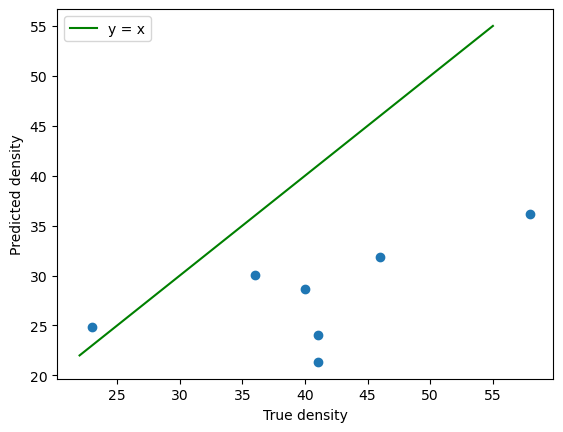

In [72]:
plt.scatter(block_0104_true_and_forecasted_values_df['True_count'], block_0104_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([22, 55], [22, 55], color='green', label='y = x')
plt.legend()
plt.show()

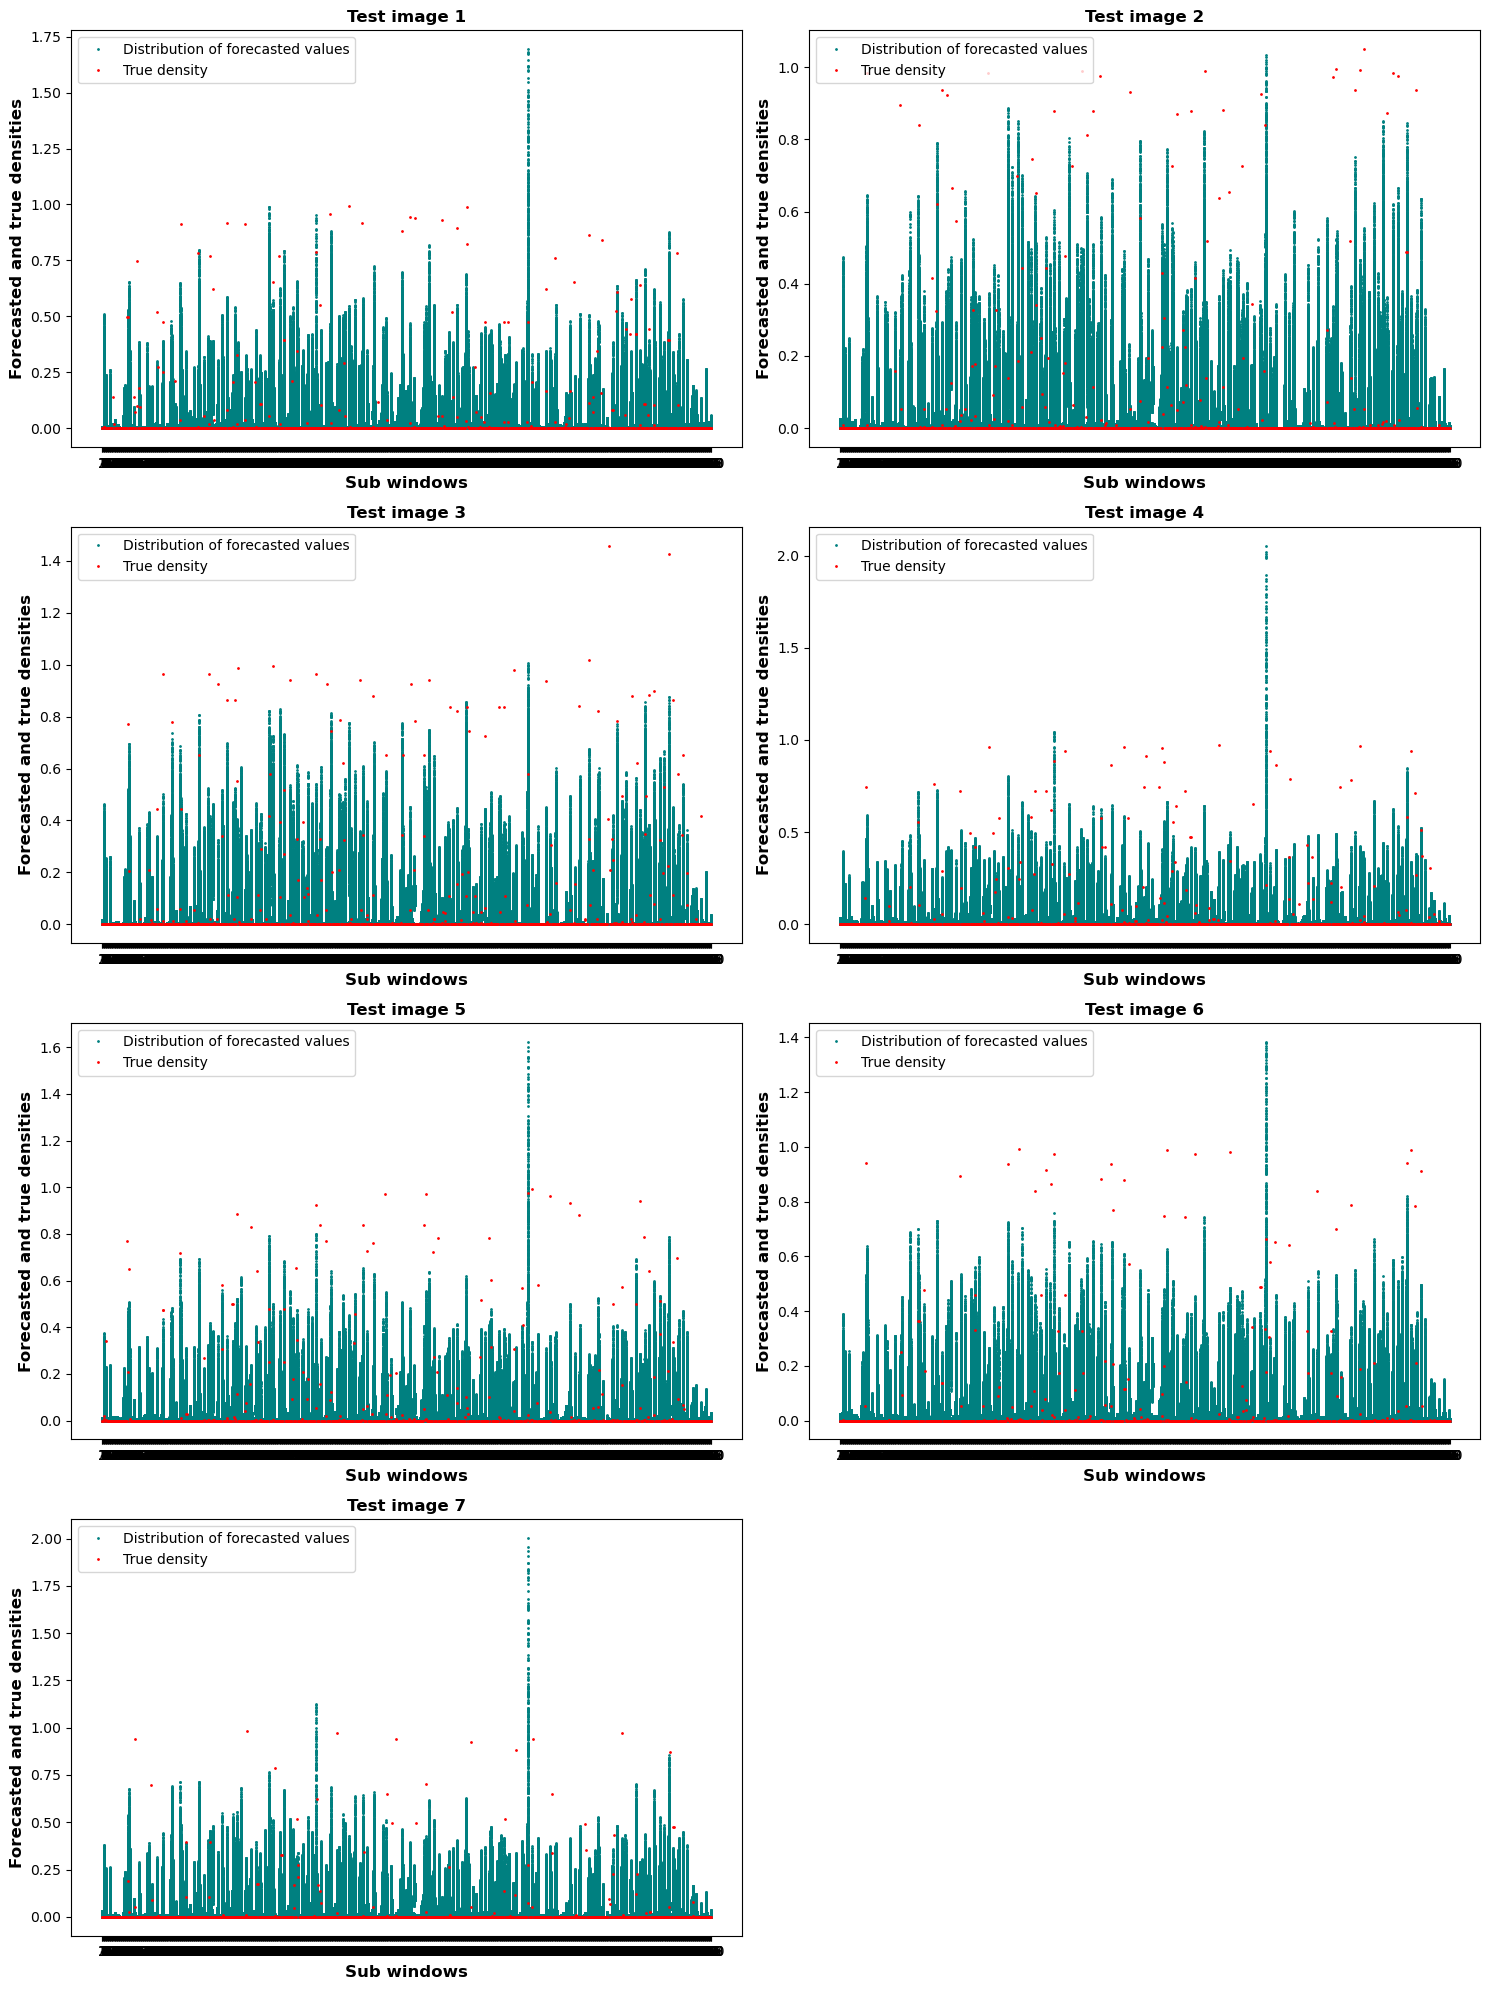

CPU times: user 29.2 s, sys: 832 ms, total: 30 s
Wall time: 29.7 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 